In [9]:
import os
import pdfplumber
import re
import pandas as pd
from tqdm import tqdm  # Para mostrar una barra de progreso

In [10]:
import pandas as pd
import networkx as nx
from itertools import combinations

# Leer el archivo CSV
df = pd.read_csv("articles_data.csv")

# Inicializar el grafo
G = nx.Graph()

# Procesar cada fila del DataFrame
for _, row in df.iterrows():
    authors_str = row.get("authors", "")
    
    if pd.isna(authors_str) or not authors_str.strip():
        continue  # Saltar si la cadena de autores está vacía o es NaN

    # Dividir autores por coma y limpiar espacios
    authors = [author.strip() for author in authors_str.split(",") if author.strip()]
    
    # Agregar nodos (autores)
    for author in authors:
        G.add_node(author)
        
    # Agregar aristas entre todos los pares de coautores
    for a1, a2 in combinations(authors, 2):
        if G.has_edge(a1, a2):
            G[a1][a2]["weight"] += 1
        else:
            G.add_edge(a1, a2, weight=1)

# Exportar el grafo a un archivo GraphML
nx.write_graphml(G, "authors_network.graphml")


C:\Users\Amalia\AppData\Local\Temp\ipykernel_14888\2943451339.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


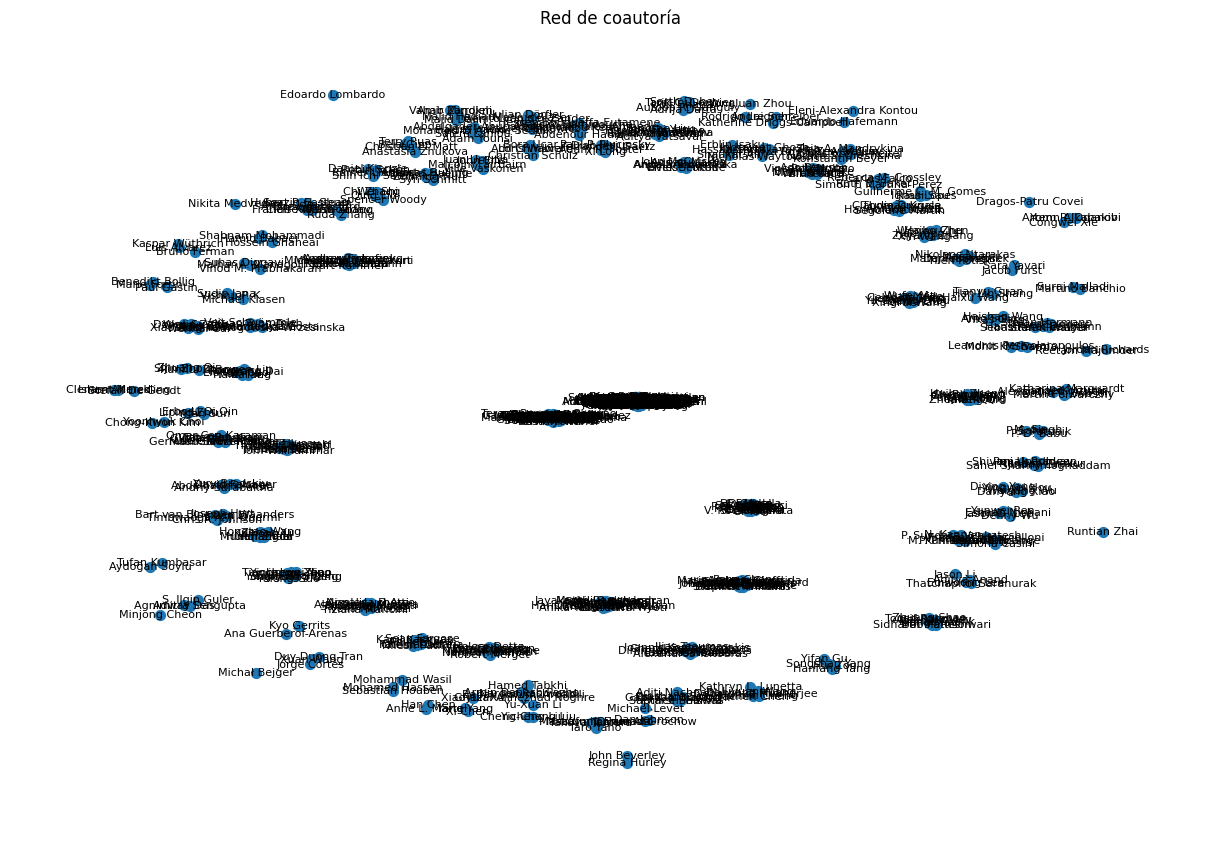

In [11]:
import matplotlib.pyplot as plt

# Dibujar el grafo (simplemente)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout para posicionar nodos
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=6)

plt.title("Red de coautoría")
plt.tight_layout()
plt.show()
